In [22]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [7]:
folder_idle = 'data/Hw5_data/data/idle'
folder_running = 'data/Hw5_data/data/running'
folder_stairs = 'data/Hw5_data/data/stairs'
folder_walking = 'data/Hw5_data/data/walking'

df_idle = pd.DataFrame()
df_running = pd.DataFrame()
df_stairs = pd.DataFrame()
df_walking = pd.DataFrame()

In [8]:
file_id = 0
for file_name in os.listdir(folder_idle):
    file_path = os.path.join(folder_idle, file_name)
    data = pd.read_csv(file_path)
    data['name_id'] = 1
    data['file_id'] = file_id
    file_id += 1
    df_idle = pd.concat([df_idle, data]).reset_index(drop=True)

df_idle.to_csv('data/Hw5_data/df_idle.csv', index=False)

file_id = 0
for file_name in os.listdir(folder_running):
    file_path = os.path.join(folder_running, file_name)
    data = pd.read_csv(file_path)
    data['name_id'] = 2
    data['file_id'] = file_id
    file_id += 1
    df_running = pd.concat([df_running, data]).reset_index(drop=True)

df_running.to_csv('data/Hw5_data/df_running.csv', index=False)

file_id = 0
for file_name in os.listdir(folder_stairs):
    file_path = os.path.join(folder_stairs, file_name)
    data = pd.read_csv(file_path)
    data['name_id'] = 3
    data['file_id'] = file_id
    file_id += 1
    df_stairs = pd.concat([df_stairs, data]).reset_index(drop=True)

df_stairs.to_csv('data/Hw5_data/df_stairs.csv', index=False)

file_id = 0
for file_name in os.listdir(folder_walking):
    file_path = os.path.join(folder_walking, file_name)
    data = pd.read_csv(file_path)
    data['name_id'] = 4
    data['file_id'] = file_id
    file_id += 1
    df_walking = pd.concat([df_walking, data]).reset_index(drop=True)

df_walking.to_csv('data/Hw5_data/df_walking.csv', index=False)

In [9]:
df_idle = pd.read_csv('data/Hw5_data/df_idle.csv')
df_running = pd.read_csv('data/Hw5_data/df_running.csv')
df_stairs = pd.read_csv('data/Hw5_data/df_stairs.csv')
df_walking = pd.read_csv('data/Hw5_data/df_walking.csv')

df = pd.concat([df_idle, df_running, df_stairs, df_walking]).reset_index(drop=True)
df.head()

,accelerometer_X,accelerometer_Y,accelerometer_Z,name_id,file_id
0,0.009577,5.937620,7.570466,1,0
1,0.086191,6.555324,7.785944,1,0
2,0.004788,6.440403,7.139510,1,0
3,0.277727,6.430826,7.690176,1,0
4,-0.047884,6.239290,7.340623,1,0


In [10]:
X = df.drop('name_id', axis=1)
X = X.drop('file_id', axis=1)
X.shape

(193860, 3)

In [11]:
y = df['name_id']
y.shape

(193860,)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_train.count()

accelerometer_X    155088
accelerometer_Y    155088
accelerometer_Z    155088
dtype: int64

In [13]:
y_train.count()

155088

In [14]:
X_test.count()

accelerometer_X    38772
accelerometer_Y    38772
accelerometer_Z    38772
dtype: int64

In [15]:
y_test.count()

38772

/Users/som/Library/Caches/pypoetry/virtualenvs/python-ds-mn4lpF3A-py3.12/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


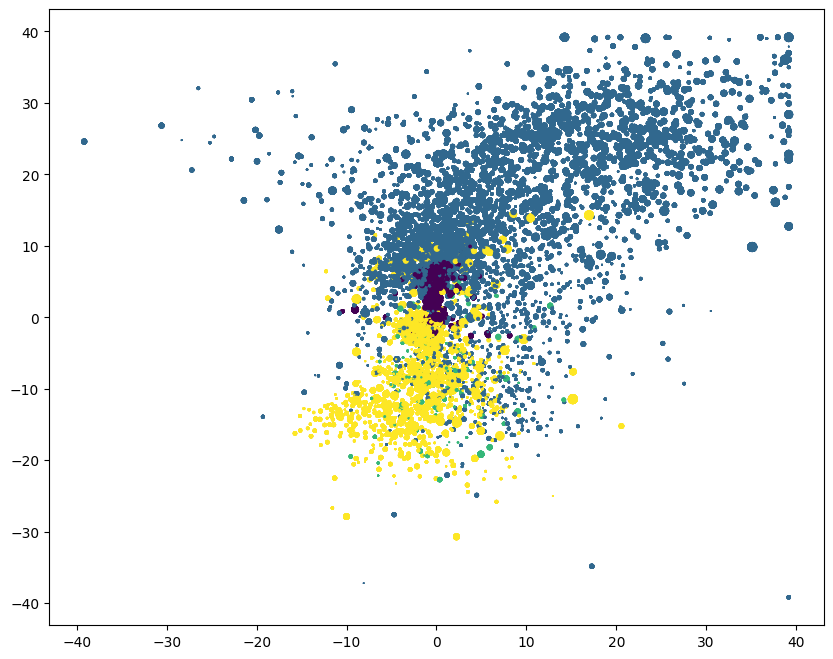

In [16]:
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.scatter(X_train['accelerometer_X'], X_train['accelerometer_Y'], X_train['accelerometer_Z'], c=y_train)
plt.show()

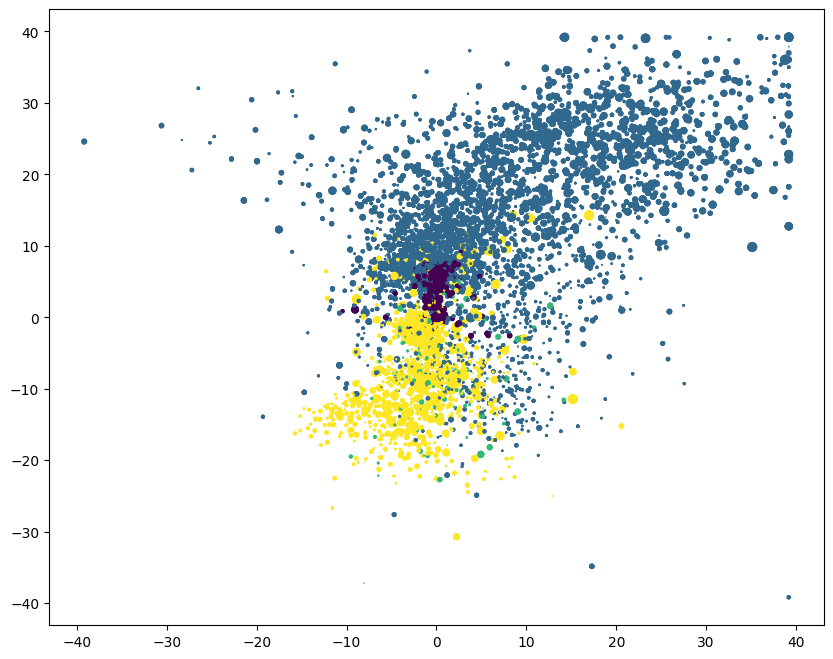

In [17]:
fig2, ax2 = plt.subplots(figsize=(10, 8))
ax2.scatter(X_test['accelerometer_X'], X_test['accelerometer_Y'], X_test['accelerometer_Z'], c=y_test)
plt.show()

In [18]:
svm_model = SVC()
rfc_model = RandomForestClassifier(n_estimators=3)


In [19]:
svm_model.fit(X_train, y_train)
rfc_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3)

In [24]:
rfc_f1_score_train = f1_score(y_train, rfc_model.predict(X_train), average='micro')
rfc_f1_score_test = f1_score(y_test, rfc_model.predict(X_test), average='micro')
print(f'f1_score RFC model\nTrain: {rfc_f1_score_train}\nTest: {rfc_f1_score_test}')

f1_score RFC model
Train: 0.9998839368616528
Test: 0.9994067884040029


In [21]:
svm_f1_score_train = f1_score(y_train, svm_model.predict(X_train), average='micro')
svm_f1_score_test = f1_score(y_test, svm_model.predict(X_test), average='micro')
print(f'f1_score SVM model\nTrain: {svm_f1_score_train}\nTest: {svm_f1_score_test}')

f1_score SVM model
Train: 0.8936990611781698
Test: 0.8930671618693903


In [23]:
svm_pred = svm_model.predict(X_test)
svm_cls_report = classification_report(y_test, svm_pred)
print(f'SVM classification report\n{svm_cls_report}')

SVM classification report
              precision    recall  f1-score   support

           1       0.96      0.99      0.97      6234
           2       0.93      0.90      0.92     20448
           3       1.00      0.00      0.01       990
           4       0.80      0.90      0.85     11100

    accuracy                           0.89     38772
   macro avg       0.92      0.70      0.69     38772
weighted avg       0.90      0.89      0.88     38772



Звіт про класифікацію SVM:

Модель досягає точності від 0.80 до 1.00 для різних класів.

Повнота змінюється від 0.00 до 0.99.

F1-мера також коливається від 0.01 до 0.97.

Точність класифікації становить 0.89.

In [26]:
rfc_pred = rfc_model.predict(X_test)
rfc_cls_report = classification_report(y_test, rfc_pred)
print(f'RFC classification report\n{rfc_cls_report}')

RFC classification report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      6234
           2       1.00      1.00      1.00     20448
           3       1.00      0.99      0.99       990
           4       1.00      1.00      1.00     11100

    accuracy                           1.00     38772
   macro avg       1.00      1.00      1.00     38772
weighted avg       1.00      1.00      1.00     38772



Звіт про класифікацію RFC:

Усі метрики (точність, повнота, F1-мера) для кожного класу становлять 1.00.

Точність класифікації також дорівнює 1.00.

__Висновки:__

__Точність:__

RFC має ідеальну точність для всіх класів, тоді як у SVM вона коливається від 0.80 до 1.00.

__Повнота:__

У SVM повнота суттєво нижча, особливо для класу 3 (0.00). У RFC повнота становить 1.00 для всіх класів, крім класу 3.

__F1-мера:__

У RFC F1-мера також ідеальна (1.00), тоді як у SVM вона коливається від 0.01 до 0.97.

__Загальна точність:__

RFC має ідеальну точність класифікації (1.00), тоді як SVM має точність 0.89.

__Отже, RFC демонструє кращу продуктивність порівняно з SVM для представлених даних, особливо з точки зору повноти та F1-мери.__